<a href="https://colab.research.google.com/github/cristianBMJ/Brain_Food_challengue/blob/main/proyeccion_demanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Plan de Trabajo:
- ¿Cuál sería tu enfoque y plan de trabajo para abordar este desafío?
- ¿Qué tareas consideras esenciales para la ejecución de este proyecto? ¿Qué elementos específicos desarrollarías para
resolver el problema planteado?

Incluye una estimación del tiempo que dedicarías a cada fase y
explique cómo tu solución impactaría positivamente en la situación actual de la empresa.

### Construcción del Modelo y Validación:
1. Construya un modelo que permita proyectar la demanda y explique las validaciones que aplicarías para determinar su eficacia. Además, indique la ventana de tiempo que seleccionarías para la proyección y justifica tu elección.

2. Generé un archivo CSV con las predicciones para el año 2024

3. Describa cómo funcionaría este modelo en un entorno productivo, con todo lo que esto
implica.

Entregue un jupyter notebook con el desarrollo.

### Medición del Beneficio en $:

Utilizando solo la información histórica proporcionada, ¿cómo propondrías medir el beneficio
económico de tu solución? Detalla los métodos o métricas que emplearías para demostrar el valor
generado para el cliente.
Metodología para la Puesta en Producción:
Diseña una metodología para asegurar que el modelo implementado en un entorno productivo
genera beneficios para la empresa. Explica los pasos clave que seguirías para monitorear y
mantener el rendimiento del modelo a lo largo del tiempo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
demanda = pd.read_csv('/content/desafio_modelo_de_demanda.csv', index_col=['fecha'], parse_dates=['fecha']) # index en tipo datetime
df = demanda.copy() #copia para evitar modificaciones en los datos fuentes
df.head()


,prod_id,precio_promedio,ventas,modelo_actual
fecha,,,,
2017-01-01,0,6651.737920,1786.0,1943.551087
2017-02-01,0,4919.698602,2194.0,1853.111850
2017-03-01,0,3277.484704,1178.0,1659.733052
2017-04-01,0,5906.864332,1010.0,1580.492875
2017-05-01,0,4662.644018,1327.0,1552.062093


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80748 entries, 0 to 80747
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            80748 non-null  datetime64[ns]
 1   prod_id          80748 non-null  int64         
 2   precio_promedio  80748 non-null  float64       
 3   ventas           80748 non-null  float64       
 4   modelo_actual    80748 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 3.1 MB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
prod_id,80748.0,498.788379,290.397741,0.000000,248.000000,494.000000,751.000000,999.000000
precio_promedio,80748.0,5386.770862,2893.919808,606.335817,3018.438689,5079.052675,7336.782635,13978.011657
ventas,80748.0,1089.565958,716.509618,0.000000,547.000000,954.000000,1468.000000,6404.000000
modelo_actual,80748.0,1093.682259,507.905494,0.000000,713.346179,1064.464617,1421.259490,5397.308408


 La tabla descriptiva  muestra que el promedio de ventas proyectadas `modelo_actual` supera el promedio de ventas realizadas `ventas`. En general, si es el único proveedor, debe ocurrir que:

`modelo_actual` $\geq$ `ventas`.  




In [24]:
# cuantos tipos de productos se comercializan
print('Cantidad  de prod_id únicos: ',  df['prod_id'].unique().size )


Cantidad  de prod_id únicos:  1000


In [50]:
df.groupby('prod_id').count()

,precio_promedio,ventas,modelo_actual
prod_id,,,
0,84,84,84
1,132,132,132
2,120,120,120
3,132,132,132
4,108,108,108
...,...,...,...
995,60,60,60
996,60,60,60
997,60,60,60


In [49]:
df.groupby('fecha').sum()


,prod_id,precio_promedio,ventas,modelo_actual
fecha,,,,
2012-01-01,55925,5.973550e+05,171115.0,172998.220135
2012-02-01,55925,5.919531e+05,163879.0,167404.077320
2012-03-01,55925,6.423368e+05,79903.0,138569.090872
2012-04-01,55925,5.990087e+05,88810.0,127292.294715
2012-05-01,55925,5.734366e+05,88917.0,105241.382397
...,...,...,...,...
2023-08-01,320609,3.473765e+06,615778.0,633323.672162
2023-09-01,320609,3.440911e+06,631728.0,629796.846255
2023-10-01,320609,3.465328e+06,636012.0,632034.451815


## Comparacion de las ventas realizadas y las ventas proyectadas

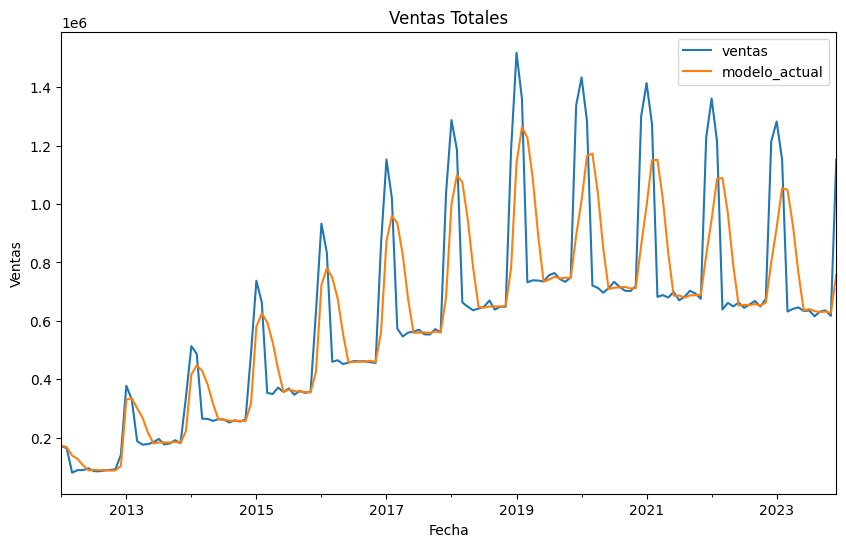

In [53]:
all_products = df.groupby('fecha').sum() # agrupa por el primer dia de cada mes
                                         # Y suma el total de ventas de todos los productos de ese dia.


# Plot  de  la venta de todos los productos
all_products[['ventas', 'modelo_actual']   ].plot(figsize=(10, 6), title='Ventas Totales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

In [34]:
df['2023']['prod_id']

<ipython-input-34-d9745e8b575c>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2023']['prod_id']


fecha
2023-01-01      0
2023-02-01      0
2023-03-01      0
2023-04-01      0
2023-05-01      0
             ... 
2023-08-01    998
2023-09-01    998
2023-10-01    998
2023-11-01    998
2023-12-01    998
Name: prod_id, Length: 7620, dtype: int64

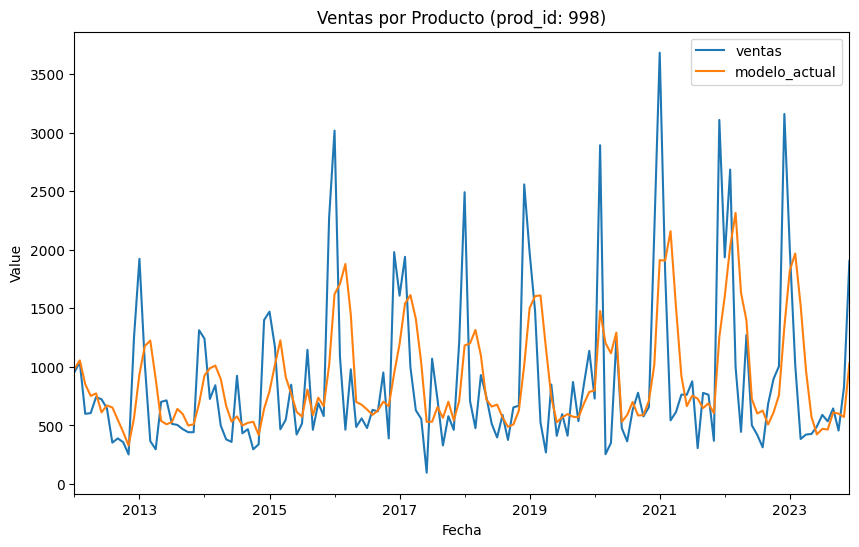

In [55]:
# Plot time Series de producto  vendido  por la empresa


df_filter =df[ df[ 'prod_id' ] == 998   ]
df_filter[['ventas', 'modelo_actual']   ].plot(figsize=(10, 6), title='Ventas por Producto (prod_id: 998)')
plt.xlabel('Fecha')
plt.ylabel('Value')
plt.show()
